In [ ]:
# !pip install git+https://github.com/fspinna/autoencoders.git

In [1]:
from autoencoders.plots import plot_grouped_history, plot_latent_space, plot_reconstruction_vae, \
        plot_labeled_latent_space_matrix
from autoencoders.datasets import load_cbf
from autoencoders.variational_autoencoder_v2 import build_vae

In [2]:
X_train, y_train, X_test, y_test = load_cbf()
input_shape = X_train.shape[1:]
latent_dim = 2  # number of latent dimensions


SHAPES:
TRAINING SET:  (420, 128, 1)
TEST SET:  (180, 128, 1)


In [3]:
autoencoder_kwargs = {
    "filters": [4, 4, 4, 4],
    "kernel_size": [3, 3, 3, 3],
    "padding": ["same", "same", "same", "same"],
    "activation": ["relu", "relu", "relu", "relu"],
    "pooling": [1, 1, 1, 1],
    "n_layers": 4,
    "optimizer": "adam",
    "n_layers_residual": None,
    "batch_normalization": None,
    "kl_weight": 0.1  # bigger -> more gaussian latent space; smaller -> less gaussian latent space
}

In [9]:
encoder, decoder, autoencoder = build_vae(input_shape, latent_dim, autoencoder_kwargs)

Model: "Encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 1)]          0         
                                                                 
 conv1d_10 (Conv1D)          (None, 128, 4)            16        
                                                                 
 activation_8 (Activation)   (None, 128, 4)            0         
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 128, 4)           0         
 1D)                                                             
                                                                 
 conv1d_11 (Conv1D)          (None, 128, 4)            52        
                                                                 
 activation_9 (Activation)   (None, 128, 4)            0         
                                                           

In [10]:
hist = autoencoder.fit(X_train, X_train, epochs=200, validation_split=0.2)

Epoch 1/200
11/11 [==============================] - 4s 79ms/step - loss: 16.0744 - mse: 16.0356 - val_loss: 17.0066 - val_mse: 16.9553
Epoch 2/200
11/11 [==============================] - 0s 33ms/step - loss: 15.2811 - mse: 15.2469 - val_loss: 15.9406 - val_mse: 15.9214
Epoch 3/200
11/11 [==============================] - 0s 31ms/step - loss: 14.0473 - mse: 13.9997 - val_loss: 14.2157 - val_mse: 13.9921
Epoch 4/200
11/11 [==============================] - 0s 37ms/step - loss: 12.1031 - mse: 11.3909 - val_loss: 11.9786 - val_mse: 10.1277
Epoch 5/200
11/11 [==============================] - 0s 39ms/step - loss: 9.9821 - mse: 8.9558 - val_loss: 9.3047 - val_mse: 8.5113
Epoch 6/200
11/11 [==============================] - 0s 35ms/step - loss: 7.9034 - mse: 7.1171 - val_loss: 7.4932 - val_mse: 6.6695
Epoch 7/200
11/11 [==============================] - 0s 34ms/step - loss: 6.4161 - mse: 5.8147 - val_loss: 6.2352 - val_mse: 5.6433
Epoch 8/200
11/11 [==============================] - 0s 35ms

11/11 [==============================] - 0s 29ms/step - loss: 1.8485 - mse: 1.3341 - val_loss: 1.8211 - val_mse: 1.2987
Epoch 63/200
11/11 [==============================] - 0s 29ms/step - loss: 1.8348 - mse: 1.3054 - val_loss: 1.8275 - val_mse: 1.2820
Epoch 64/200
11/11 [==============================] - 0s 27ms/step - loss: 1.8091 - mse: 1.3098 - val_loss: 1.8226 - val_mse: 1.3034
Epoch 65/200
11/11 [==============================] - 0s 29ms/step - loss: 1.7920 - mse: 1.2852 - val_loss: 1.8329 - val_mse: 1.3483
Epoch 66/200
11/11 [==============================] - 0s 30ms/step - loss: 1.8010 - mse: 1.3030 - val_loss: 1.8330 - val_mse: 1.3322
Epoch 67/200
11/11 [==============================] - 0s 27ms/step - loss: 1.8151 - mse: 1.3101 - val_loss: 1.8590 - val_mse: 1.3227
Epoch 68/200
11/11 [==============================] - 0s 28ms/step - loss: 1.8303 - mse: 1.3072 - val_loss: 1.8473 - val_mse: 1.3381
Epoch 69/200
11/11 [==============================] - 0s 28ms/step - loss: 1.8142 

11/11 [==============================] - 0s 35ms/step - loss: 1.7279 - mse: 1.2295 - val_loss: 1.7198 - val_mse: 1.1716
Epoch 124/200
11/11 [==============================] - 0s 35ms/step - loss: 1.7301 - mse: 1.2333 - val_loss: 1.7485 - val_mse: 1.2185
Epoch 125/200
11/11 [==============================] - 0s 28ms/step - loss: 1.7265 - mse: 1.2543 - val_loss: 1.7512 - val_mse: 1.2407
Epoch 126/200
11/11 [==============================] - 0s 24ms/step - loss: 1.7249 - mse: 1.2299 - val_loss: 1.7573 - val_mse: 1.2563
Epoch 127/200
11/11 [==============================] - 0s 27ms/step - loss: 1.7299 - mse: 1.2400 - val_loss: 1.7486 - val_mse: 1.2778
Epoch 128/200
11/11 [==============================] - 0s 27ms/step - loss: 1.7284 - mse: 1.2314 - val_loss: 1.7095 - val_mse: 1.2045
Epoch 129/200
11/11 [==============================] - 0s 28ms/step - loss: 1.7311 - mse: 1.2501 - val_loss: 1.7450 - val_mse: 1.2155
Epoch 130/200
11/11 [==============================] - 0s 29ms/step - loss: 

11/11 [==============================] - 1s 53ms/step - loss: 1.6859 - mse: 1.2082 - val_loss: 1.6892 - val_mse: 1.1738
Epoch 185/200
11/11 [==============================] - 0s 40ms/step - loss: 1.6906 - mse: 1.1972 - val_loss: 1.6865 - val_mse: 1.1918
Epoch 186/200
11/11 [==============================] - 0s 33ms/step - loss: 1.6830 - mse: 1.1858 - val_loss: 1.7045 - val_mse: 1.2124
Epoch 187/200
11/11 [==============================] - 1s 55ms/step - loss: 1.6944 - mse: 1.2216 - val_loss: 1.7326 - val_mse: 1.2384
Epoch 188/200
11/11 [==============================] - 0s 46ms/step - loss: 1.7008 - mse: 1.2205 - val_loss: 1.6818 - val_mse: 1.1928
Epoch 189/200
11/11 [==============================] - 0s 32ms/step - loss: 1.6721 - mse: 1.1962 - val_loss: 1.6796 - val_mse: 1.2268
Epoch 190/200
11/11 [==============================] - 0s 38ms/step - loss: 1.6842 - mse: 1.2112 - val_loss: 1.7201 - val_mse: 1.2182
Epoch 191/200
11/11 [==============================] - 0s 41ms/step - loss: 

In [11]:
autoencoder.evaluate(X_test, X_test)

6/6 [==============================] - 0s 6ms/step - loss: 1.6693 - mse: 1.1985


[1.6692808866500854, 1.198458194732666]

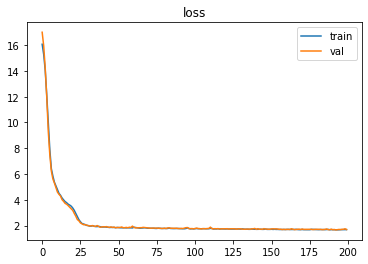

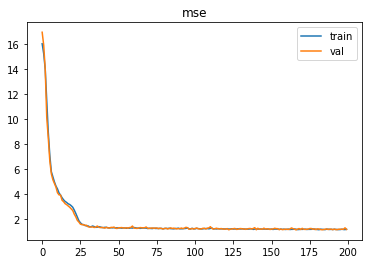

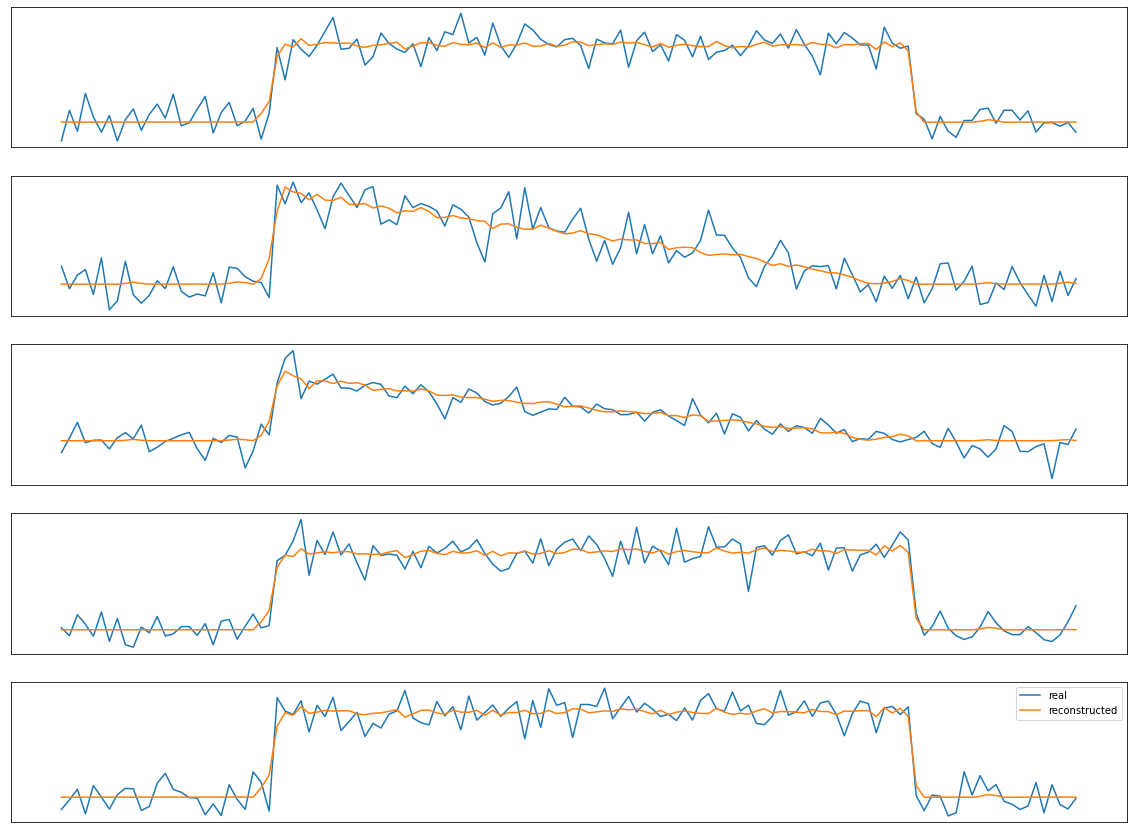

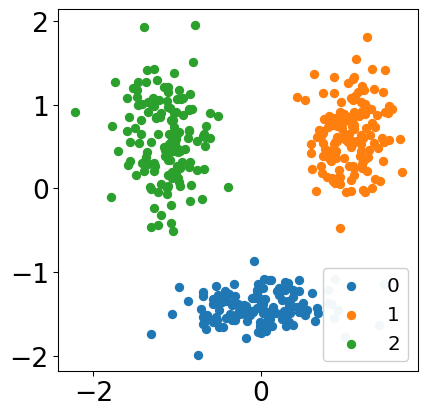

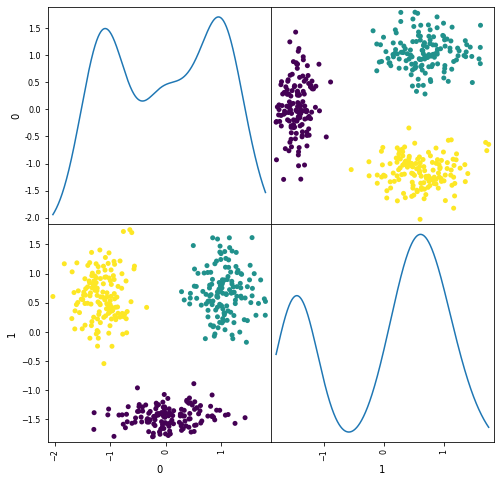

In [12]:
plot_grouped_history(hist.history)
plot_reconstruction_vae(X_train[:5], encoder, decoder)
plot_latent_space(encoder.predict(X_train), y_train)
plot_labeled_latent_space_matrix(encoder.predict(X_train), y_train)